In [393]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
from uncertainties import ufloat
from uncertainties.umath import *
import astropy.units as u


In [394]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-dark-palette')

/tmp/ipykernel_698/1667230561.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [395]:
plt.rcParams["figure.figsize"]=8,6
plt.rcParams.update({'font.size': 16})

In [396]:
#exoplanets = pd.read_csv('./data/exoplanetas_julio_22.csv')
exoplanets_rmp = pd.read_csv('./data/exoplanets_rmp_july23.csv') # with P, M and R determined
exoplanets = pd.read_csv('./data/exoplanets_july23.csv') # all, uso esta porque comprobé que filtrando por P, M y R no se pierde nada

In [397]:
# nuestros planetas
radio_1199 = [0.938*u.R_jup, 0.033*u.R_jup]
radio_1273 = [1.055*u.R_jup, 0.195*u.R_jup]
masa_1199 = [0.233*u.M_jup, 0.018*u.M_jup]
masa_1273 = [0.216*u.M_jup, 0.013*u.M_jup]

In [398]:
print(len(exoplanets))
print(len(exoplanets_rmp))

5400
1106


In [399]:
exoplanets.columns

Index(['pl_name', 'default_flag', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim',
       'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
       'pl_bmassprov', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_met', 'st_mete

In [400]:
parecidos = exoplanets[exoplanets.pl_orbper >= 1.0]
parecidos = parecidos[parecidos.pl_orbper <= 10.0]
parecidos = parecidos[parecidos.pl_bmasse >= 60.0]
parecidos = parecidos[parecidos.pl_bmasse <= 100.0]
parecidos = parecidos[parecidos.pl_bmasseerr1/parecidos.pl_bmasse <= 0.20]
parecidos = parecidos[parecidos.pl_bmasseerr2/parecidos.pl_bmasse >= -0.20]
parecidos = parecidos[parecidos.pl_radeerr1/parecidos.pl_rade <= 0.20]
parecidos = parecidos[parecidos.pl_radeerr2/parecidos.pl_rade >= -0.20]
parecidos.shape

(28, 71)

In [401]:
parecidos.pl_rade

116      6.390
314     10.749
322     11.153
323     12.689
344      9.247
358     14.493
421      8.967
423     10.223
4667    11.747
4682    12.733
4873     9.100
4879    13.798
4933    11.657
4939     8.140
4991    10.929
5015     8.295
5019    12.000
5063     5.820
5178    13.675
5192    12.498
5193     8.474
5204    12.218
5227    13.271
5239    16.388
5240    11.990
5257    14.235
5293    12.442
5310    11.657
Name: pl_rade, dtype: float64

In [402]:
masas = np.linspace(50,110, 1000)
densidades=np.asarray([0.1,0.5,1.0,1.5,2.0, 1000])
cambio_de_unid = 1/0.01747765891
densidades = densidades*cambio_de_unid
radios1 = (3/(4*np.pi)*masas/densidades[0])**(1/3)
radios2 = (3/(4*np.pi)*masas/densidades[1])**(1/3)
radios3 = (3/(4*np.pi)*masas/densidades[2])**(1/3)
radios4 = (3/(4*np.pi)*masas/densidades[3])**(1/3)
radios5 = (3/(4*np.pi)*masas/densidades[4])**(1/3)
radios6 = (3/(4*np.pi)*masas/densidades[5])**(1/3)


In [403]:
#OTEGI 2020 M-R relation

radios7 = 0.70*masas**(0.63)*u.R_earth.to(u.R_jup)

/tmp/ipykernel_698/809886865.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='pl_bmasse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


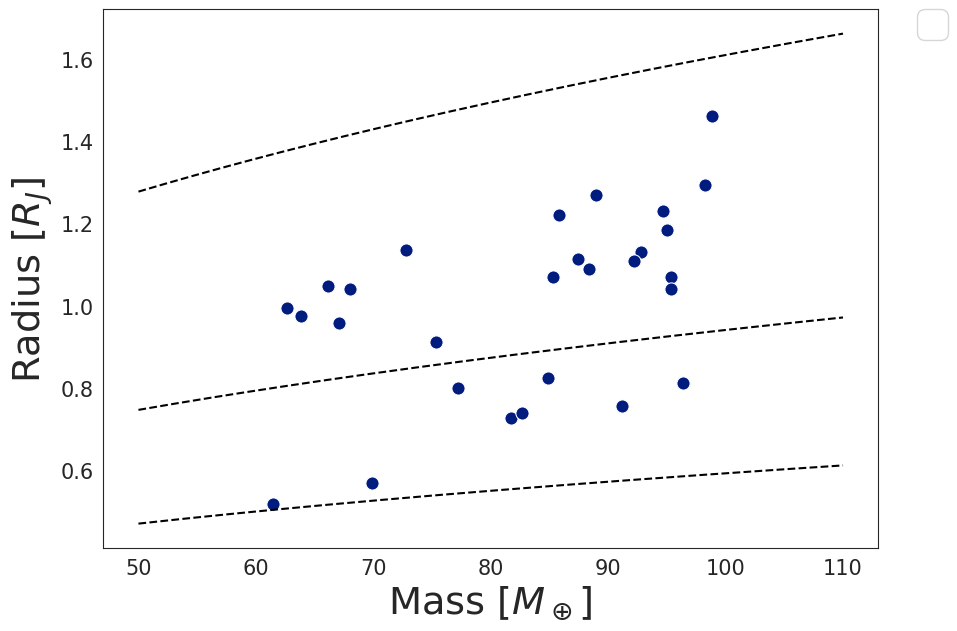

In [404]:
figure = plt.figure(figsize=(10, 7))
sns.set_style("white")
sns.scatterplot(x='pl_bmasse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='xx-large')
plt.xlabel('Mass [$M_\oplus$]', fontsize='xx-large')
plt.ylabel('Radius [$R_J$]', fontsize='xx-large')

plt.plot(masas,radios1, color='black', label='Density = 0.1', linestyle="--")
plt.plot(masas,radios2, color='black', label='Density = 0.5', linestyle="--")
#plt.plot(masas,radios3, color='red', label='Density = 100')
#plt.plot(masas,radios4, color='black', label='Density = 1.5')
plt.plot(masas,radios5, color='black', label='Density = 2.0', linestyle="--")
#plt.plot(masas,radios6, color='red', label='Density = 5')
# plt.xlim(60,100)
#plt.ylim(0.1,1.5)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15)

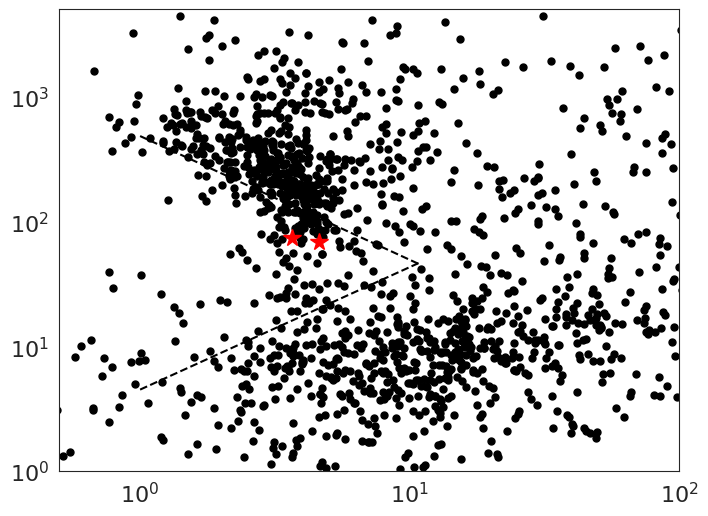

In [405]:
def des1(x):
    return 0.98*x-1.85
def des2(x):
    return -0.99*x+0.18
x=np.linspace(1,11,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_bmasse'], 'o', color='black', markersize=5)
plt.plot(x, 10**des1(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot(x, 10**des2(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot([3.67], [masa_1199[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [masa_1273[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5,100)
plt.ylim(1,5000)
plt.show()

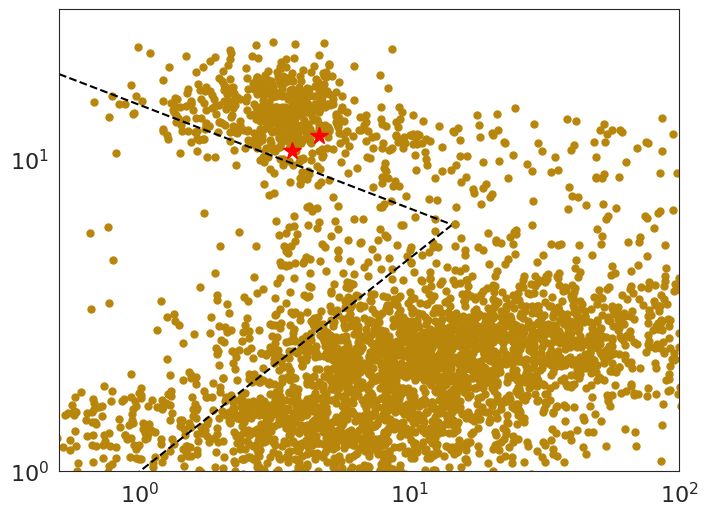

In [406]:
#neptunian desert in Period radius diagram
def des3(x):
    return -0.33*x+1.17
def des4(x):
    return 0.68*x
x=np.linspace(0.5,14.3,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_rade'], 'o', color='C4', markersize=5)
plt.plot(x, 10**des3(np.log10(x)), color='black', linestyle='--')
plt.plot(x, 10**des4(np.log10(x)), color='black', linestyle='--')
plt.plot([3.67], [radio_1199[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [radio_1273[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5, 100)
plt.ylim(1, 30)
plt.show()

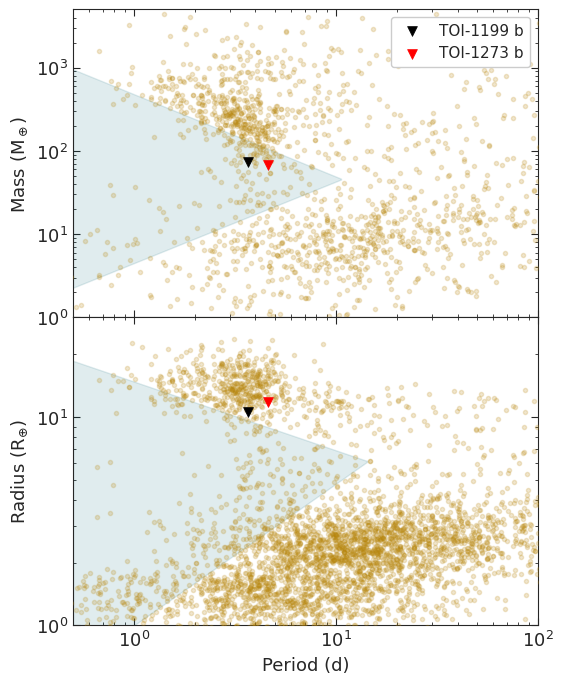

In [465]:
fig, axes = plt.subplots(2, sharex=True, sharey=False, figsize=(6,8))
fig.subplots_adjust(hspace=0)

x1=np.linspace(0.5,10.6,200)
y1=10**des1(np.log10(x1))*317.907
y2=10**des2(np.log10(x1))*317.907

axes[0].plot(exoplanets['pl_orbper'], exoplanets['pl_bmasse'], 'o', color='C4', markersize=3, alpha=0.2, zorder=9)
axes[0].scatter(3.67, masa_1199[0].to(u.M_earth).value, marker="v", edgecolors='k', linewidths=0.5, s=50, c='k', label='TOI-1199 b', zorder=10) #c='mediumturquoise
axes[0].scatter(4.63, masa_1273[0].to(u.M_earth).value, marker="v", edgecolors='r', linewidths=0.5, s=50, c='r', label='TOI-1273 b', zorder=10) #c='mediumseagreen'
axes[0].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(0.5,100)
axes[0].set_ylim(1,5000)
axes[0].set_ylabel('Mass (M$_\oplus$)', fontsize=13)
axes[0].fill_between(x1, y1, y2, color='C5', alpha=0.12)
axes[0].legend(loc='upper right', fontsize=11, framealpha=1, frameon=True).set_zorder(11) 

x2=np.linspace(0.5,14.3,200)
y3=10**des3(np.log10(x2))
y4=10**des4(np.log10(x2))
axes[1].plot(exoplanets['pl_orbper'], exoplanets['pl_rade'], 'o', color='C4', markersize=3, alpha=0.2, zorder=9)
axes[1].scatter(3.67, radio_1199[0].to(u.R_earth).value, marker='v', edgecolors='k', linewidths=0.5, s=50, c='k', label='TOI-1199 b', zorder=10)
axes[1].scatter(4.63, radio_1273[0].to(u.R_earth).value, marker='v', edgecolors='r', linewidths=0.5, s=50, c='r', label='TOI-1273 b', zorder=10)
axes[1].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim(0.5, 100)
axes[1].set_ylim(1, 30)
axes[1].set_xlabel('Period (d)', fontsize=13)
axes[1].set_ylabel('Radius (R$_{\oplus}$)', fontsize=13)
axes[1].fill_between(x2, y3, y4, color='C5', alpha=0.12)
#plt.savefig('desert_plot.png', dpi=300, bbox_inches='tight', facecolor='white')

In [408]:
len(exoplanets)

5400

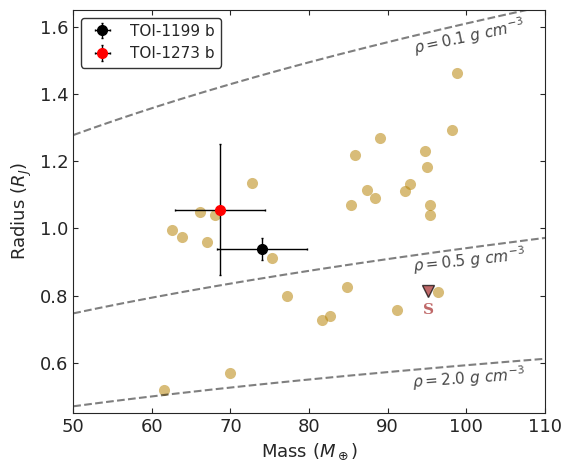

In [409]:
from curses.panel import bottom_panel

plt.figure(figsize=(6, 5))
plt.plot(parecidos['pl_bmasse'], parecidos['pl_radj'], 'o', color='C4', ms=8, 
        markeredgecolor='k', markeredgewidth=0, alpha=0.55)
plt.xlabel('Mass ($M_\oplus$)', fontsize=13)
plt.ylabel('Radius ($R_J$)', fontsize=13)
plt.plot(masas, radios1, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios2, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios5, color='black', linewidth=1.5, linestyle="--", alpha=0.5)

plt.errorbar([masa_1199[0].to(u.M_earth).value], [radio_1199[0].value], marker='o', ls='none', ms=7, color='k', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1199[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI-1199 b')

plt.errorbar([masa_1273[0].to(u.M_earth).value], [radio_1273[0].value], marker='o', ls='none', ms=7, color='r', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1273[1].value], 
            markeredgecolor='r', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI-1273 b')

plt.plot([95.16], [0.8145], marker='v', ls='none', ms=8, color='brown', markeredgecolor='k', markeredgewidth=1, alpha=0.7)
plt.text(94.53, 0.745, 'S', fontsize=11, alpha=0.7,  weight='bold', fontfamily='serif', style='normal',  color='brown')

plt.tick_params(axis='both', labelsize=15)
plt.text(93, 1.52, r'$\rho = 0.1 ~g~ cm^{-3}$', fontsize=11, rotation=12, alpha=0.85)
plt.text(93, 0.87, r'$\rho = 0.5 ~g~ cm^{-3}$', fontsize=11, rotation=6, alpha=0.85)
plt.text(93, 0.525, r'$\rho = 2.0 ~g~ cm^{-3}$', fontsize=11, rotation=4, alpha=0.85)

plt.tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
plt.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
plt.xlim(50,110)
plt.ylim(0.45,1.65)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=11, frameon=True, edgecolor='k', fancybox=True, markerscale=1)
#plt.savefig('density_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

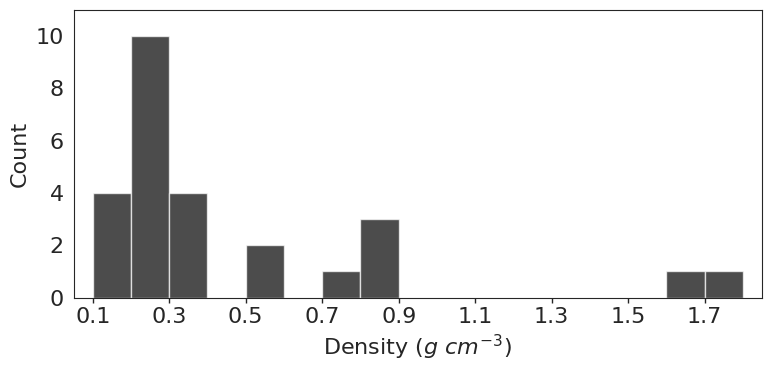

In [410]:
plt.figure(figsize=(8, 4))
plt.hist(parecidos.pl_dens, bins=np.arange(0.0, 1.9, 0.1), histtype='bar', color='k', alpha=0.7) ##8EBA42
plt.xlabel('Density ($g~cm^{-3}$)')
plt.tick_params(axis='both', bottom=True, left=False, direction='out', width=1)
plt.xticks(np.arange(0.1, 1.8, 0.2))
plt.xlim(0.05, 1.85)
#plt.yticks([])
plt.ylim(0, 11)
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('density_hist.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [411]:
exoplanets.columns

Index(['pl_name', 'default_flag', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim',
       'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
       'pl_bmassprov', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_met', 'st_mete

(0.0, 2.0)

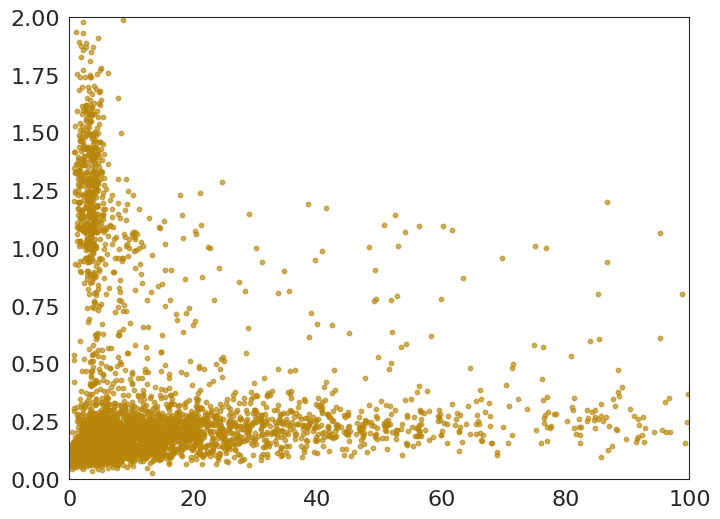

In [412]:
plt.scatter(exoplanets['pl_orbper'], exoplanets['pl_radj'], s=10, color='C4', alpha=0.65)
plt.xlim(0, 100)
plt.ylim(0, 2)

# BIS vs RVs    

In [413]:
data_11 = pd.read_table('./data/rvs/1199_final_rvs.dat', sep='\s+')
data_11.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_11 = np.array((data_11.rv-data_11.rv.mean())*1000)
yerr_rv_11 = np.array(data_11.err*1000)

data_12 = pd.read_table('./data/rvs/1273_final_rvs.dat', sep='\s+')
data_12.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_12 = np.array((data_12.rv-data_12.rv.mean())*1000)
yerr_rv_12 = np.array(data_12.err*1000)

In [414]:
print(data_11.bjd.min(), data_11.bjd.max())
print(data_12.bjd.min(), data_12.bjd.max())

58856.67683 59749.39015
58887.60797 59787.39647


In [415]:
# pearson coefficients between RVs and BIS
pearson_1199 = np.corrcoef(data_11.bis, data_11.rv)[0,1]
print(pearson_1199)
pearson_1273 = np.corrcoef(data_12.bis, data_12.rv)[0,1]
print(pearson_1273)


-0.028164997529961808
-0.0603499281974863


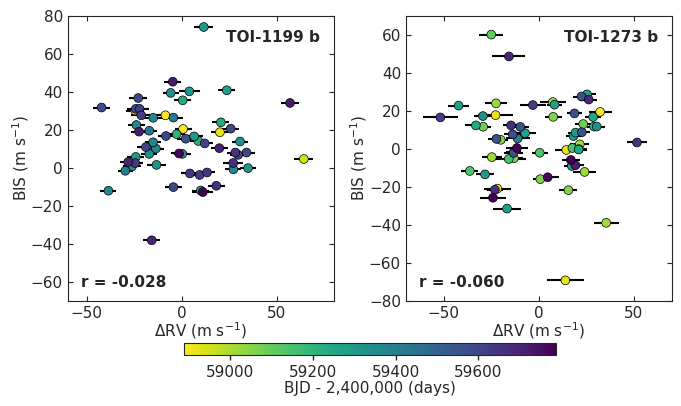

In [416]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
fig.subplots_adjust(wspace=0.20)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
g = axes[0].scatter(y_rv_11, data_11.bis*1e3, c=data_11.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI-1199 b')
axes[0].errorbar(y_rv_11, data_11.bis*1e3, xerr=yerr_rv_11, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[0].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[0].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[0].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'semibold', 'size':'11'})
g = axes[1].scatter(y_rv_12, data_12.bis*1e3, c=data_12.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI-1273 b')
axes[1].errorbar(y_rv_12, data_12.bis*1e3, xerr=yerr_rv_12, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[1].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[1].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[1].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'demibold', 'size':'11'})
axes[0].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=11)
axes[1].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=11)
axes[0].set_xlim(-60, 80)
axes[0].set_ylim(-70, 80)
axes[1].set_xlim(-70, 70)
axes[1].set_ylim(-80, 70)
# show pearson coefficients in the plot at the bottom left
axes[0].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1199), transform=axes[0].transAxes, fontsize=11, weight='semibold')
axes[1].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1273), transform=axes[1].transAxes, fontsize=11, weight='semibold')
cbar =fig.colorbar(g, location='bottom', ax=axes.ravel().tolist(), shrink=0.6, aspect=30, pad=0.11)
cbar.ax.tick_params(labelsize=11, width=1)
cbar.set_label(label='BJD - 2,400,000 (days)', fontsize=11, labelpad=0.6)
#plt.savefig('bisrv.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# TSM

In [417]:
# define a function to calculate the Transmission Spectroscopic Metric according to Kempton et al. 2018
# inputs are Rp(r_earth), Teq, Mp(m_earth), Rstar(rsol), mj

def TSM(Rp, Teq, Mp, Rstar, mj):
    # if any entry is NaN, return NaN
    # if np.isnan(Rp) or np.isnan(Teq) or np.isnan(Mp) or np.isnan(Rstar) or np.isnan(mj):
    #     return np.nan
    scale = 1.15
    return scale * Rp**3 * Teq * 10**(-mj/5) / (Mp * Rstar**2)


In [418]:
Rp_1199 = ufloat(radio_1199[0].to(u.R_earth).value, radio_1199[1].to(u.R_earth).value)
Rp_1273 = ufloat(radio_1273[0].to(u.R_earth).value, radio_1273[1].to(u.R_earth).value)
Mp_1199 = ufloat(masa_1199[0].to(u.M_earth).value, masa_1199[1].to(u.M_earth).value)
Mp_1273 = ufloat(masa_1273[0].to(u.M_earth).value, masa_1273[1].to(u.M_earth).value)

In [419]:
Teq_1199 = ufloat(1492, 29)
Teq_1273 = ufloat(1232, 21)
mj_1199 = ufloat(9.83, 0.02)
mj_1273 = ufloat(9.81, 0.02)
Rstar_1199 = ufloat(1.451, 0.045)
Rstar_1273 = ufloat(1.086, 0.028)
tsm_1199 = TSM(Rp_1199, Teq_1199, Mp_1199, Rstar_1199, mj_1199)
tsm_1273 = TSM(Rp_1273, Teq_1273, Mp_1273, Rstar_1273, mj_1273)

In [420]:
print('tsm 1199:', tsm_1199)
print('tsm 1273:', tsm_1273)


tsm 1199: 138+/-20
tsm 1273: (3.2+/-1.8)e+02


In [421]:
# define a new column in the dataframe with the TSM
parecidos['tsm_err'] = parecidos.apply(lambda row: TSM(ufloat(row['pl_rade'], row['pl_radeerr1']),
                                                    ufloat(row['pl_eqt'], row['pl_eqterr1']),
                                                    ufloat(row['pl_bmasse'], row['pl_bmasseerr1']),
                                                    ufloat(row['st_rad'], row['st_raderr1']), ufloat(row['sy_jmag'], row['sy_jmagerr1']),), axis=1)



In [422]:
parecidos['tsm'] = parecidos.apply(lambda row: TSM(row['pl_rade'], row['pl_eqt'], row['pl_bmasse'], 
                                                     row['st_rad'], row['sy_jmag']), axis=1)

In [423]:
parecidos['tsm']

116            NaN
314     290.385658
322     264.329912
323     229.676396
344      86.868905
358     153.613338
421      73.143640
423     127.171758
4667     88.789488
4682    213.911039
4873    128.672234
4879    168.733812
4933           NaN
4939     70.370310
4991     66.474278
5015     79.018271
5019    183.126394
5063     43.727143
5178    355.542063
5192    102.703880
5193           NaN
5204    168.674760
5227    159.987088
5239    419.443280
5240           NaN
5257           NaN
5293           NaN
5310    134.023672
Name: tsm, dtype: float64

In [424]:
# make a dataframe with the pl_bmasse, tsm and pl_eqt, then add two rows with the values of our planets
tsm_df = parecidos[['pl_bmasse', 'tsm', 'pl_eqt']]
new_row = pd.DataFrame({'pl_bmasse': masa_1199[0].to(u.M_earth).value, 'tsm': tsm_1199.n, 'pl_eqt': Teq_1199.n}, index=[0])
tsm_df = pd.concat([new_row, tsm_df.loc[:]]).reset_index(drop=True)
new_row2 = pd.DataFrame({'pl_bmasse': masa_1273[0].to(u.M_earth).value, 'tsm': tsm_1273.n, 'pl_eqt': Teq_1273.n}, index=[0])
tsm_df = pd.concat([new_row2, tsm_df.loc[:]]).reset_index(drop=True)

# Plot mass vs radio y mass vs tsm

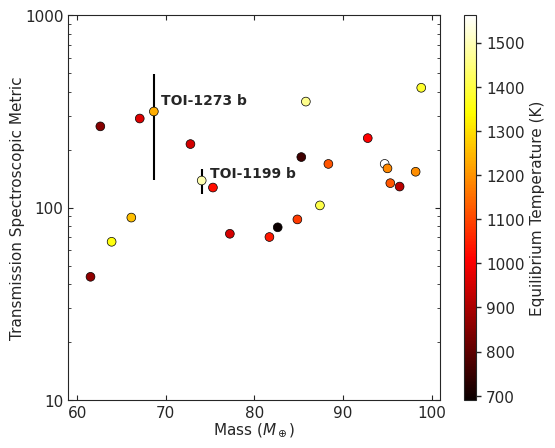

In [425]:
fig, ax = plt.subplots(figsize=(6,5))
# plot mass vs Tsm and color by equilibrium temperature
# ax.scatter(parecidos['pl_bmasse'], parecidos['tsm'], c=parecidos['pl_eqt'], cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10)
g = ax.scatter(tsm_df['pl_bmasse'], tsm_df['tsm'], c=tsm_df['pl_eqt'], cmap='hot', s=40, edgecolors='k', linewidths=0.5, zorder=10)
#add errorbar
ax.errorbar(masa_1199[0].to(u.M_earth).value, tsm_1199.n, yerr=tsm_1199.s, fmt='none', ecolor='k', markersize=7, zorder=-10)
#add errorbar
ax.errorbar(masa_1273[0].to(u.M_earth).value, tsm_1273.n, yerr=tsm_1273.s, fmt='none', ecolor='k', markersize=7, zorder=-10)
ax.set_xlabel("Mass ($M_\oplus$)", labelpad=0., fontsize=11)
ax.set_ylabel("Transmission Spectroscopic Metric", labelpad=0., fontsize=11)
ax.tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=11)
ax.set_xlim(59, 101)
ax.set_yscale('log')
ax.set_ylim(1e1, 1e3)
cbar = fig.colorbar(g, ax=ax, location='right',  aspect=30)
cbar.ax.tick_params(labelsize=11, width=1)
cbar.set_label(label='Equilibrium Temperature (K)', fontsize=11)
# put text labels to the planet names at the side of the points
ax.text(0.38, 0.58, 'TOI-1199 b', transform=ax.transAxes, fontsize=10, weight='bold')
ax.text(0.25, 0.77, 'TOI-1273 b', transform=ax.transAxes, fontsize=10, weight='bold')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#plt.savefig('tsm.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

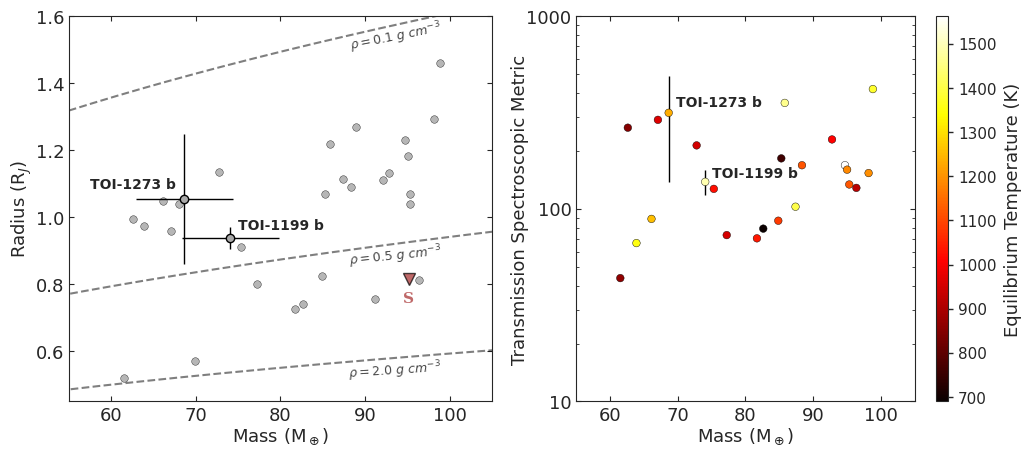

In [460]:
# lets replot the mass vs radius side by side with mass vs tsm
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.20)

# axes[0].plot(parecidos['pl_bmasse'], parecidos['pl_radj'], 'o', color='darkgray', ms=8, 
#         markeredgecolor='k', markeredgewidth=0, alpha=0.85)
axes[0].scatter(parecidos['pl_bmasse'], parecidos['pl_radj'], c='darkgray', s=30, edgecolors='k', linewidths=0.3, alpha=0.85)
axes[0].set_xlabel('Mass (M$_\oplus$)', fontsize=13, labelpad=1)
axes[0].set_ylabel('Radius (R$_{J}$)', fontsize=13, labelpad=1)
axes[0].plot(masas, radios1, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
axes[0].plot(masas, radios2, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
axes[0].plot(masas, radios5, color='black', linewidth=1.5, linestyle="--", alpha=0.5)

axes[0].errorbar([masa_1199[0].to(u.M_earth).value], [radio_1199[0].value], marker='o', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1199[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b')
axes[0].errorbar([masa_1273[0].to(u.M_earth).value], [radio_1273[0].value], marker='o', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1273[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b')
axes[0].plot([95.16], [0.8145], marker='v', ls='none', ms=8, color='brown', markeredgecolor='k', markeredgewidth=1, alpha=0.7)
axes[0].text(94.53, 0.745, 'S', fontsize=11, alpha=0.7,  weight='bold', fontfamily='serif', style='normal',  color='brown')
axes[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
axes[0].set_xlim(55,105)
axes[0].set_ylim(0.45,1.6)
g = axes[1].scatter(tsm_df['pl_bmasse'], tsm_df['tsm'], c=tsm_df['pl_eqt'], cmap='hot', s=30, edgecolors='k', linewidths=0.3, zorder=10)
axes[1].errorbar(masa_1199[0].to(u.M_earth).value, tsm_1199.n, yerr=tsm_1199.s, fmt='none', ecolor='k',
                  elinewidth=1, markersize=7, zorder=-10)
axes[1].errorbar(masa_1273[0].to(u.M_earth).value, tsm_1273.n, yerr=tsm_1273.s, fmt='none', ecolor='k', 
                 elinewidth=1, markersize=7, zorder=-10)
axes[1].set_xlabel("Mass (M$_\oplus$)", fontsize=13, labelpad=1)
axes[1].set_ylabel("Transmission Spectroscopic Metric", labelpad=-1.7, fontsize=13)
axes[1].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=13)
axes[1].set_xlim(55, 105)
axes[1].set_yscale('log')
axes[1].set_ylim(1e1, 1e3)
cbar = fig.colorbar(g, ax=axes[1], location='right',  aspect=30)
cbar.ax.tick_params(labelsize=11, width=1)
cbar.set_label(label='Equilibrium Temperature (K)', fontsize=13, labelpad=5)
# put text labels to the planet names at the side of the points
axes[1].text(75, 145, 'TOI-1199 b', fontsize=10, weight='bold')
axes[1].text(69.8, 340, 'TOI-1273 b', fontsize=10, weight='bold')
axes[1].yaxis.set_major_formatter(mticker.ScalarFormatter())
axes[0].text(75, 0.965, 'TOI-1199 b', fontsize=10, weight='bold')
axes[0].text(57.5, 1.085, 'TOI-1273 b', fontsize=10, weight='bold')
axes[0].text(88, 1.50, r'$\rho = 0.1 ~g~ cm^{-3}$', fontsize=9, rotation=11.25, alpha=0.85)
axes[0].text(88, 0.857, r'$\rho = 0.5 ~g~ cm^{-3}$', fontsize=9, rotation=5.8, alpha=0.85)
axes[0].text(88, 0.52, r'$\rho = 2.0 ~g~ cm^{-3}$', fontsize=9, rotation=3.8, alpha=0.85)
#plt.savefig('mass_radio_tsm.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()